# Simple Diamond Cut Predictor (Classifier) using Various ML Algoritms

This notebook is a simple Classifier that will be used to predict the Cut of diamonds based on a variety of factors.

A few of the Algoritms used in this notebook are:
- XGBoost
- RandomForestClassifier
- K-NearestNeighbors
- Naive Bayes

Disclaimer: The dataset was found on Kaggle and does not belong to me. It can be found here (https://www.kaggle.com/shivam2503/diamonds). This is one of my first DS projects, so I found and used many helpful guides to learn and structure my code/problem solving. The Kaggle guided notebook I found most helpful (and borrowed ideas from) is `lucidlenn's data analysis and classification using XGBoost` that uses classifiers to classify objects in space! It can be found here: https://www.kaggle.com/lucidlenn/data-analysis-and-classification-using-xgboost


In [2]:
#used following kaggle as reference: https://www.kaggle.com/lucidlenn/data-analysis-and-classification-using-xgboost
#dataset: https://www.kaggle.com/shivam2503/diamonds

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.model_selection import train_test_split, cross_val_predict
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.decomposition import PCA
from xgboost import XGBClassifier
#import xgboost as xgb

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

import time

import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 12

plt.rc('font', size = SMALL_SIZE)
plt.rc('axes', titlesize = MEDIUM_SIZE)
plt.rc('axes', labelsize = MEDIUM_SIZE)
plt.rcParams['figure.dpi'] = 150


##Importing Data and Content Description &nbsp;

###Content of Dataset (columns) &nbsp;

**price:** price in USD

**carat:** weight of the diamond &nbsp;

**cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal) 

**color:** diamond color, from J (worst) to D (best)

**clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, Si1, VS2, VS1, VVS2, VVS1, 1F (best))


**x:** length in mm 

**y:** width in mm

**z:** depth in mm 

**depth:** total depth percentage = z / mean(x,y) = 2*z / (x+y)

**table:** width of top of diamond relative to widest point 

In [3]:
'''
importing diamonds.csv as dataframe, index_col is the first col in .csv

Notes: initially renamed col 0 and included it, however results are better when ID col is removed from dataset (kept for reference)
'''

#diamonds_df = pd.read_csv('diamonds.csv').rename(columns = {'Unnamed: 0' : 'ID'})

#first col is used for enumerating CSV file (ID number)
diamonds_df = pd.read_csv('diamonds.csv').iloc[:,1:] 

#prints the Dtype of each col
diamonds_df.info()  


#prints the first 5 rows
print('\nHead of dataset:\n',diamonds_df.head())    
#prints name of each col as list
print('\n', diamonds_df.columns.values) 

#print(diamonds_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB

Head of dataset:
    carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63

In [4]:
'''
describing the diamonds.csv data
gives simple stats of each col
'''

diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#Univariate Analysis

Examining the relationship between the cut of a diamond and it's table (width of top of diamond relative to its widest point).

Text(0.5, 0.98, 'Ideal Cut Diamond')

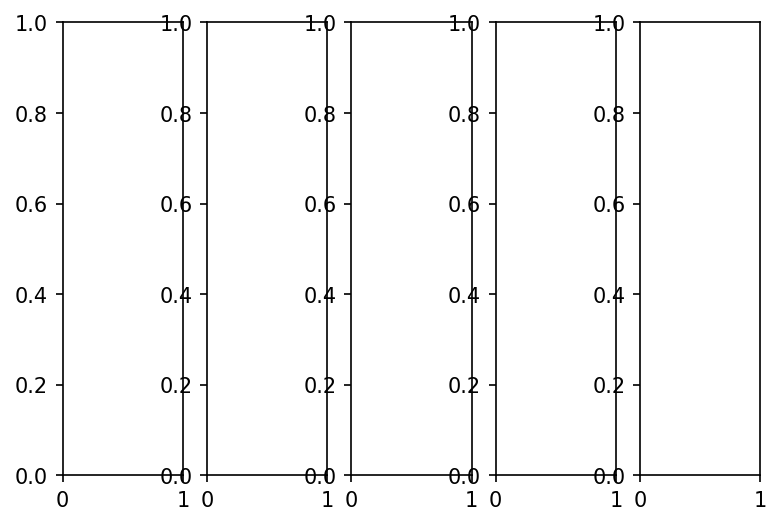

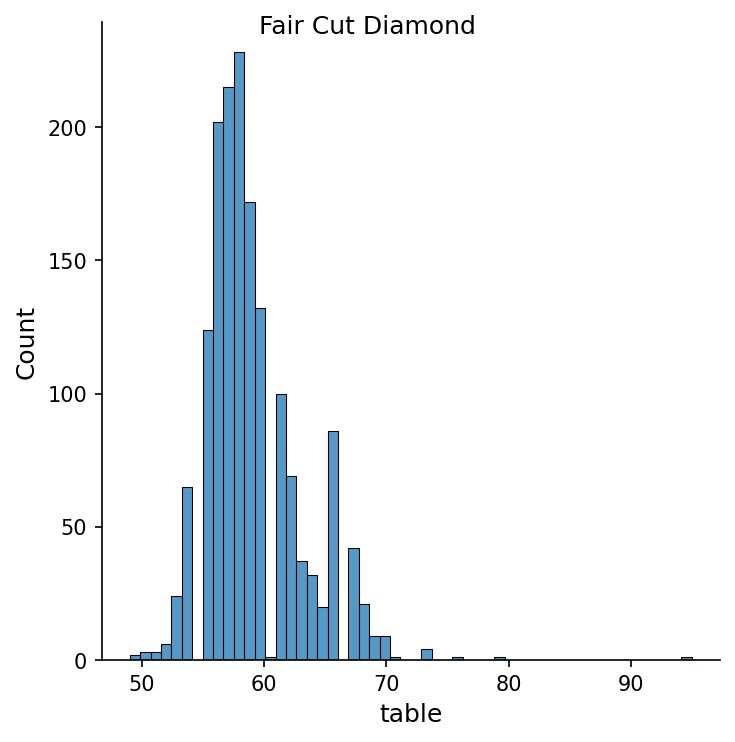

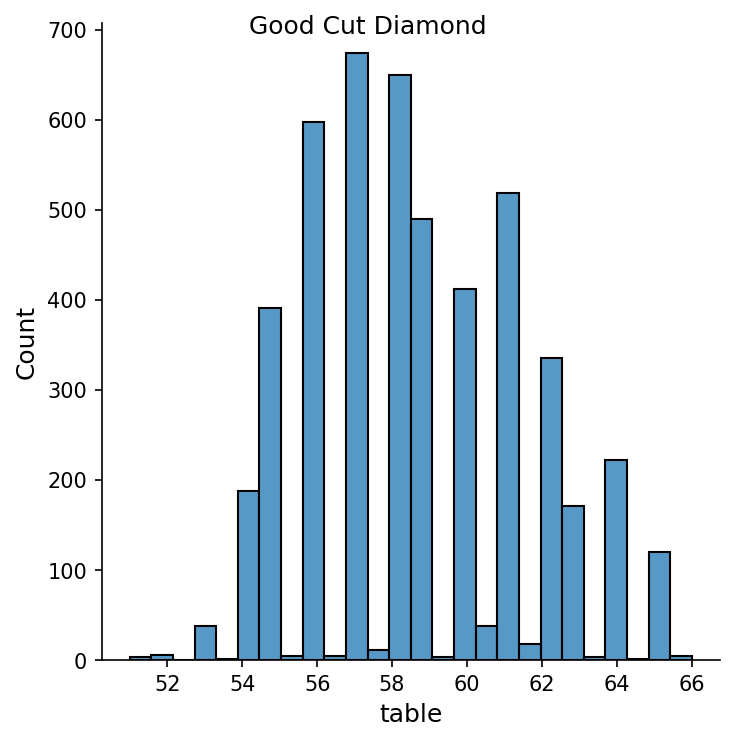

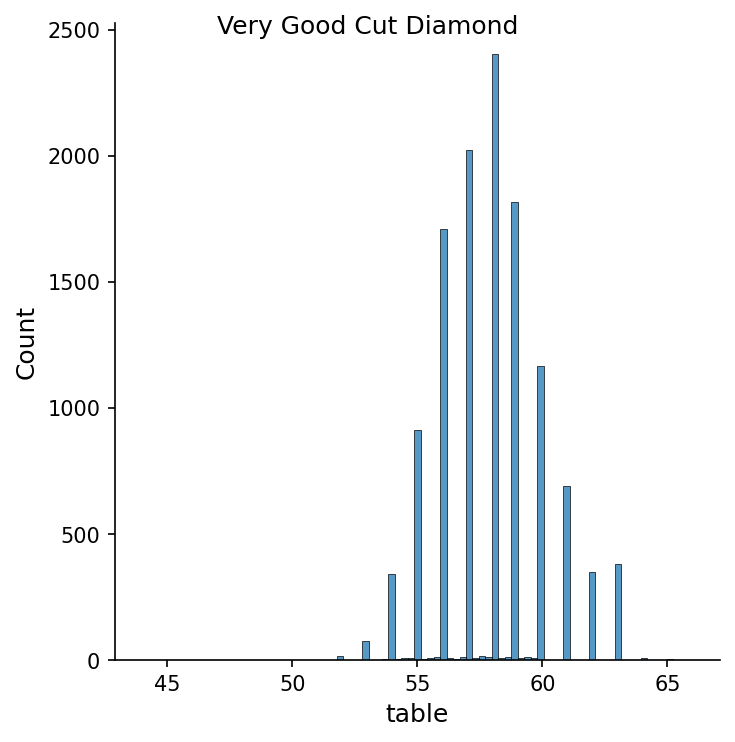

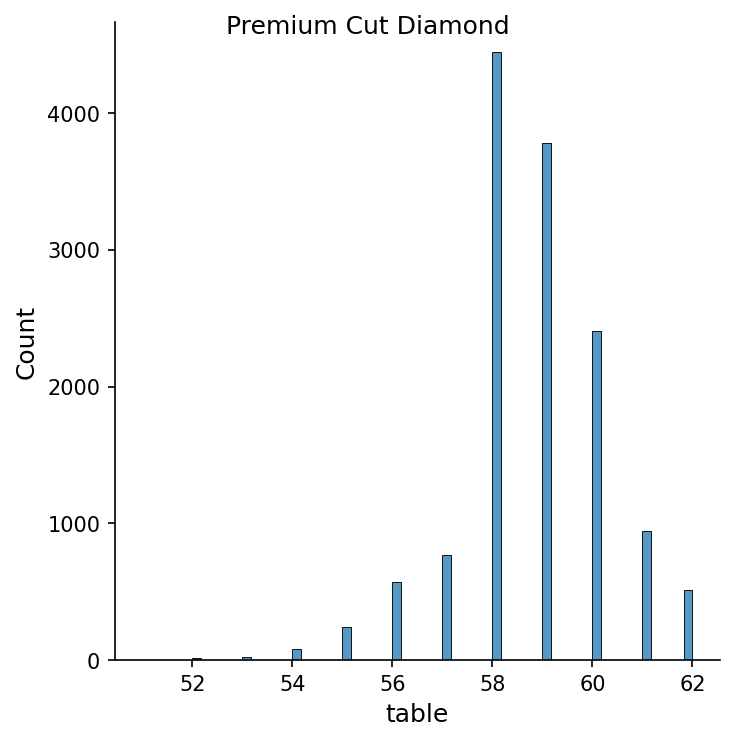

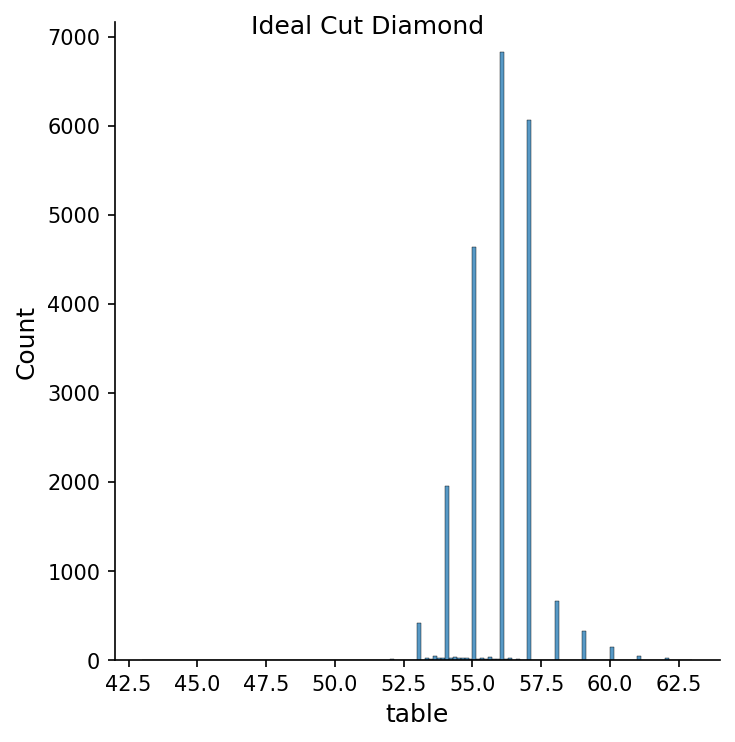

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=5)

ax = sns.displot(diamonds_df[diamonds_df['cut']=='Fair'].table, ax = axes[0])
ax.fig.suptitle('Fair Cut Diamond')

ax = sns.displot(diamonds_df[diamonds_df['cut']=='Good'].table, ax = axes[1])
ax.fig.suptitle('Good Cut Diamond')

ax = sns.displot(diamonds_df[diamonds_df['cut']=='Very Good'].table, ax = axes[2])
ax.fig.suptitle('Very Good Cut Diamond')

ax = sns.displot(diamonds_df[diamonds_df['cut']=='Premium'].table, ax = axes[3])
ax.fig.suptitle('Premium Cut Diamond')

ax = sns.displot(diamonds_df[diamonds_df['cut']=='Ideal'].table, ax = axes[4])
ax.fig.suptitle('Ideal Cut Diamond')

In [6]:
#describing each histogram above

print("Fair\n",diamonds_df.loc[diamonds_df["cut"]=="Fair", "table"].describe(),

"\n\nGood\n",diamonds_df.loc[diamonds_df["cut"]=="Good", "table"].describe(),

"\n\nVery Good\n",diamonds_df.loc[diamonds_df["cut"]=="Very Good", "table"].describe(),

"\n\nPremium\n",diamonds_df.loc[diamonds_df["cut"]=="Premium", "table"].describe(),

"\n\nIdeal\n",diamonds_df.loc[diamonds_df["cut"]=="Ideal", "table"].describe())

Fair
 count    1610.000000
mean       59.053789
std         3.946261
min        49.000000
25%        56.000000
50%        58.000000
75%        61.000000
max        95.000000
Name: table, dtype: float64 

Good
 count    4906.000000
mean       58.694639
std         2.851300
min        51.000000
25%        56.000000
50%        58.000000
75%        61.000000
max        66.000000
Name: table, dtype: float64 

Very Good
 count    12082.000000
mean        57.956150
std          2.121448
min         44.000000
25%         56.000000
50%         58.000000
75%         59.000000
max         66.000000
Name: table, dtype: float64 

Premium
 count    13791.000000
mean        58.746095
std          1.478573
min         51.000000
25%         58.000000
50%         59.000000
75%         60.000000
max         62.000000
Name: table, dtype: float64 

Ideal
 count    21551.000000
mean        55.951668
std          1.246423
min         43.000000
25%         55.000000
50%         56.000000
75%         57.000000

#Results

Relatively normal distribution for each cut of diamond. However there are some interesting differences to note: &nbsp;


**Standard Deviation**: As the cut of diamond gets better, the std. of table gets smaller. (Largest std. for Fair, smallest std. for Ideal)

**Distribution**: As the cut of diamond gets better, the distribution between the min and max value of the table gets smaller. However this only applies until the Premium Cut diamonds, which have a smaller distribution of values than the Ideal Cut.
In addition, the Fair, Premium, and Ideal cuts have a slightly skewed distribution - while good and very good do not.

#Formatting and Encoding Data

In order to improve the performance of ML algorithms (as well as to make them more easily readable) I am encoding the string values to integers. 

In [7]:
diamonds_df_feat = diamonds_df

#encode cut labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(diamonds_df_feat['cut'])
diamonds_df_feat['cut'] = y_encoded




In [8]:
#feature scaling - scalling all values to be within the (0,1) interval will reduce distortion due to exceptionally high values and make some algorithms converge faster

scaler = MinMaxScaler()

#note issues with scaler on converting E (color) to int; coverting SI1 (clarity) to float
#used mapping to encode color and clarity strings as numbers (1 is best, 7(color) & 8(clarity) is worst)
mapping_color = {
    'D':'1',
    'E':'2',
    'F':'3',
    'G':'4',
    'H':'5',
    'I':'6',
    'J':'7'
}
mapping_clarity = {
    'I1':'8',
    'SI2':'7',
    'SI1':'6',
    'VS2':'5',
    'VS1':'4',
    'VVS2':'3',
    'VVS1':'2',
    'IF':'1'
}
diamonds_df_feat['color'] = diamonds_df_feat['color'].map(mapping_color)
diamonds_df_feat['clarity'] = diamonds_df_feat['clarity'].map(mapping_clarity)

diamonds = scaler.fit_transform(diamonds_df_feat.drop('cut', axis=1))

#diamonds = diamonds_df_feat.drop('cut', axis=1)


#Training and Testing the Models

**Training & Testing Data:** Data set is split into 3rds with 1/3 reserved for Testing.

**Models Used for Learning:** 

- **KNN:** SciKit Learn's K Nearest Neighbors algorithm estimates how likely a datapoint is to being a member of one group or another based on how many datapoints are nearest it.
- **Gaussian Naive Bayes:** SciKit Learn's Guassian Naive Bayes Classifier calculates the probability of a hypothesis given prior knowledge. Called Naive Bayes because it simplifies the calculation of probabilities, Guassian assumes Guasian distribution (normal distribution).
- **XGBoost:** Xtreme Gradient Boosting algorithm. Combination of gradient boosting and decision trees. Does "extreme" pruning of trees to efficiently classify. Currently one of the best "out of box" classifiers.
- **Random Forest Classifier**: SciKit Learn's Random Forest Classifier creates a multitude of decisions trees that are informed by the previous tree (called Boostrap Aggregation, or Bagging). Randomly samples with replacement through weightings.

**Scoring Based on Accuracy:** Accuracy is sum of correct predictions divided by total number of predictions.

**Training Time:** Time Taken to train model.

**Prediction Time:** Time taken by model to predict (classifiy).



In [9]:
#splitting data to create the training & testing datasets 

x_train, x_test, y_train, y_test = train_test_split(diamonds, diamonds_df_feat['cut'], test_size = 0.33)

In [10]:
#K Nearest Neighbors

knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(x_train, y_train)

training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(x_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end - training_start
knn_prediction_time = prediction_end - prediction_start

print('Scikit-Learn\'s K Nearest Neighbors Classifier prediction accuracy is: %3.2f' %(acc_knn))
print('Time consumed for training: %4.3f seconds' %(knn_train_time))
print('Time consumed for prediction: %6.5f seconds' %(knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier prediction accuracy is: 63.73
Time consumed for training: 0.343 seconds
Time consumed for prediction: 1.48817 seconds


In [11]:
#Naive Bayes

from sklearn.preprocessing import MaxAbsScaler

scaler_gnb = MaxAbsScaler()
diamonds = scaler_gnb.fit_transform(diamonds_df_feat.drop('cut', axis = 1))
x_train_gnb, x_test_gnb, y_train_gnb, y_test_gnb = train_test_split(diamonds, diamonds_df_feat['cut'], test_size = 0.33)

gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(x_train_gnb, y_train_gnb)

training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(x_test_gnb)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100

gnb_train_time = training_end - training_start
gnb_prediction_time = training_end - training_start

print('Scikit-Learn\'s Gaussian Naive Bayes Classifier prediction accuracy is: %3.2f' %(acc_gnb))
print('Time consumed for training: %4.3f seconds' %(gnb_train_time))
print('Time consumed for prediction: %6.5f seconds' %(gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier prediction accuracy is: 56.44
Time consumed for training: 0.016 seconds
Time consumed for prediction: 0.01582 seconds


In [12]:
#XGBoost

xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(x_train, y_train)

training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(x_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

xgb_train_time = training_end - training_start
xgb_prediction_time = prediction_end - prediction_start

print('XGBoost\'s prediction accuracy is: %3.2f' %(acc_xgb))
print('Time consumed for training: %4.3f seconds' %(xgb_train_time))
print('Time consumed for prediction: %6.5f seconds' %(xgb_prediction_time))

XGBoost's prediction accuracy is: 79.56
Time consumed for training: 14.460 seconds
Time consumed for prediction: 0.35882 seconds


In [13]:
#Random Forest Classifier

rfc = RandomForestClassifier(n_estimators=100)
training_start = time.perf_counter()
rfc.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(x_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100

rfc_train_time = training_end - training_start
rfc_prediction_time = prediction_end - prediction_start

print('Random Forest\'s prediction accuracy is: %3.2f' %(acc_rfc))
print('Time consumed for training: %4.3f seconds' %(rfc_train_time))
print('Time consumed for prediction: %6.5f seconds' %(rfc_prediction_time))


Random Forest's prediction accuracy is: 78.42
Time consumed for training: 12.565 seconds
Time consumed for prediction: 0.67542 seconds


##Comparison of Results from Machine Learning Algorithms &nbsp;

Comparing the results of the ML Algorithms against one another to see:
- which is most accurate at classifying this problem
- which is fastest at training and prediction


In [14]:
#results from different learning algorithims

result = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'XGBoost', 'Random Forest'],
    'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time]
})

result_df = result.sort_values(by='Score', ascending = False)
result_df = result_df.set_index('Model')
result_df

,Score,Runtime Training,Runtime Prediction
Model,,,
XGBoost,79.557328,14.460284,0.358817
Random Forest,78.416943,12.565163,0.675422
KNN,63.726757,0.342601,1.488171
Naive Bayes,56.440649,0.015816,0.015816


##K Fold Cross Validation

Conducting 10 Fold Cross-Validation on Random Forest and XGBoost because they are the two algorithms that performed the best.

**Cross-Validation (cv):** A resampling procedure to determine the validity of results on different samples of test and training data.

**K-Fold:** The K (in this case 10) in K-Fold cross validation refer to the number of groups that the data sample is to be split into.

**n_estimators:** The number of trees built before taking the maximum voting or averages of predictions.  

In [15]:
#Cross Validation for Random Forest

from sklearn.model_selection import cross_val_score

rfc_cv = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(rfc_cv, x_train, y_train, cv=10, scoring = 'accuracy')

print('Scores: ', scores)
print('Mean: ', scores.mean())
print('Standard Deviation: ', scores.std())

Scores:  [0.77255119 0.77753182 0.78749308 0.773658   0.79219701 0.78278915
 0.78140564 0.77974543 0.77614831 0.79047883]
Mean:  0.7813998472281811
Standard Deviation:  0.00649289352446652


In [16]:
#Cross Validation for XGBoost

xgb_cv = XGBClassifier(n_estimators = 100)
scores = cross_val_score(xgb_cv, x_train, y_train, cv=10, scoring = 'accuracy')

print('Scores: ', scores)
print('Mean: ', scores.mean())
print('Standard Deviation: ', scores.std())

Scores:  [0.79441063 0.80105147 0.80298838 0.79219701 0.81239624 0.79883785
 0.79164361 0.79966796 0.80077476 0.8073623 ]
Mean:  0.8001330205396456
Standard Deviation:  0.006178570654917213


#Feature Importance

Determining which of the features are most important in making a correct classification (Determining the cut of a diamond).

In this case the two most important features in determining the cut of a diamond are:
- Table: width of top of diamond relative to widest point
- Depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y)

Although I was not surprised to learn that color was a poor indicator of cut - I was surprised that price, z had such a low importance. This is because I had assumed:
- Price: A better cut diamond would fetch a higher price.
- z: z is the depth in mm, because depth (the depth percentage) was such an important feature - I had assumed the raw measurement would have a higher weight.

In [17]:
importances = pd.DataFrame({
    'Feature': diamonds_df_feat.drop('cut', axis = 1).columns,
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending = False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
table,0.456514
depth,0.243685
y,0.072154
x,0.069666
price,0.036493
clarity,0.036343
carat,0.030760
z,0.027674
color,0.026712


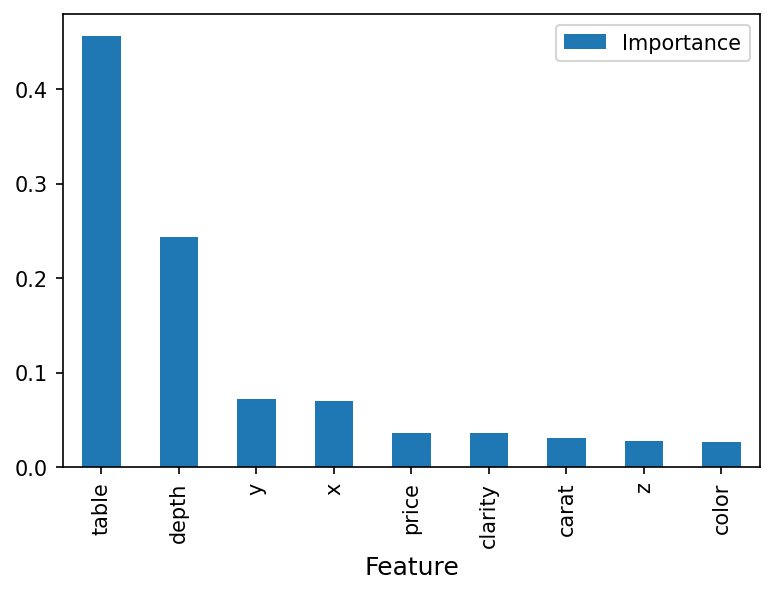

In [18]:
importances.plot.bar()

#Summary

**Algorithms:** Without hyperparameter tuning, I found that both XGBoost and Random Forest were the best classification algotithms to predict the cut of a diamond. 

**Features:** The most important features when classifying a diamond by cut are: table and depth.

#Testing Optimal Hyperparameters XGBoost

The following model implements XGBoost with tuned hyperparameters for optimal learning. We expect the model to perform better than the one before.

Hyperparameters tuned with help from AnalyticsVidhya guide found here: 
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

Hyperparameters help also found with Iris Species classification using XGBoost on Kaggle found here: https://www.kaggle.com/errearanhas/iris-classification-using-xgboost

Structure and Hyperparameters help from Sloan Digital Sky Survey DR14 found here: https://www.kaggle.com/lucidlenn/data-analysis-and-classification-using-xgboost

In [19]:
#splitting dataset for training and testing data

x_train, x_test, y_train, y_test = train_test_split(diamonds, diamonds_df_feat['cut'], test_size = 0.33)

In [20]:
#training model
'''parameter defaults:
learnging_rate (aka eta): 0.3   [rate of learning, higher == slower]
max_depth: 6    [depth of tree]
min_child_weight: 1  [defines minimum sum of weights of all observations required in child]
subsample: 1    [denotes the fraction of observations to be randomly sampled for each tree - value between [0,1]]
colsample_by tree: 1    [denotes fraction of columns to be randome sampled for each tree - value between [0,1]]
reg_alpha: 0    [L1 regularization term on weights, higher means more conservative]
'''
#xgb = XGBClassifier(parameters)

xgb = XGBClassifier(max_depth=8, learning_rate=0.27, n_estimators=100, gamma=0, min_child_weight=2, subsample=0.75, colsample_bytree=0.83, reg_alpha=1)
training_start = time.perf_counter()
xgb.fit(x_train, y_train)

training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(x_test)
prediction_end = time.perf_counter()
opt_acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

opt_xgb_train_time = training_end - training_start
opt_xgb_prediction_time = prediction_end - prediction_start

print('XGBoost\'s prediction accuracy WITH optimal parameters is: %3.2f' %(opt_acc_xgb))
print('Time consumed for training: %4.3f seconds' %(opt_xgb_train_time))
print('Time consumed for prediction: %6.5f seconds' %(opt_xgb_prediction_time))

XGBoost's prediction accuracy WITH optimal parameters is: 79.70
Time consumed for training: 16.679 seconds
Time consumed for prediction: 0.45352 seconds


#Summary of Hyperparameters Tuning

Unfortunately, tuning hyperparameters seemed to do very little to improve the prediction accuracy.

However it seems that:
- Tuning hyperparameters was able to increase accuracy by a small percentage
- Tuning hyperparameters was able to reduce training time by half and prediction time by about half as well

In order to see if this was really effective, I will run cross-validation

In [21]:
opt_xgb_cv = XGBClassifier(max_depth=8, learning_rate=0.27, n_estimators=100, gamma=0, min_child_weight=2, subsample=0.75, colsample_bytree=0.83, reg_alpha=1)


#optimal hyperparameters scores
opt_scores = cross_val_score(opt_xgb_cv, x_train, y_train, cv=10, scoring = "accuracy")

print("Optimal Scores:", opt_scores)
print("Optimal Mean:", opt_scores.mean())
print("Optimal Standard Deviation:", opt_scores.std())


Optimal Scores: [0.80852241 0.80132817 0.80215827 0.79939126 0.79275042 0.79496403
 0.79856115 0.80215827 0.79745434 0.80653197]
Optimal Mean: 0.8003820291081322
Optimal Standard Deviation: 0.004601713683385402


In [22]:
xgb_cv = XGBClassifier(n_estimators=100)

#out of box xgboost scores
scores = cross_val_score(xgb_cv, x_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80215827 0.80907582 0.80022136 0.80160487 0.79579413 0.79219701
 0.79579413 0.79966796 0.80215827 0.80763908]
Mean: 0.80063109128614
Standard Deviation: 0.004950349823046097


#Summary of Cross-Validation

It seems that tuning the hyperparameters of XGBoost did very little to improve the overall accuracy. This might mean that XGBoost without hyperparameter tuning was already at near optimal performance.